In [1]:
import torch
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import csv

#import dataset
import datasplit
import model.models as models
import trainer
import utils

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
models_folder = 'G:/PracaMagisterska/Kod_na_magisterke/gfx-classifier_RNN_version-models_and_results/models'
model_name = '20201027_fxnet_mono_disc_best'
results_folder = 'G:/PracaMagisterska/Kod_na_magisterke/gfx-classifier_RNN_version-models_and_results/result'
results_subfolder = '20201027_fxnet_mono_disc'

all_train_losses = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_train_losses.npy')), allow_pickle=True)
all_train_correct = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_train_correct.npy')), allow_pickle=True)
best_train_results = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'best_train_results.npy')), allow_pickle=True)

all_val_losses = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_val_losses.npy')), allow_pickle=True)
all_val_correct = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_val_correct.npy')), allow_pickle=True)
best_val_results = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'best_val_results.npy')), allow_pickle=True)

all_test_losses = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_test_losses.npy')), allow_pickle=True)
all_test_correct = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_test_correct.npy')), allow_pickle=True)
best_test_results = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'best_test_results.npy')), allow_pickle=True)

fx_labels = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'fx_labels.npy')), allow_pickle=True)

train_set_size = best_train_results.shape[0]
val_set_size = best_val_results.shape[0]
test_set_size = best_test_results.shape[0]

In [3]:
best_test_results[0]

array(['16835', 'G71-66602-BD2-G8T0-20816', '1', '1'], dtype='<U26')

In [4]:
fx_labels

array(['808', 'BD2', 'BMF', 'DPL', 'DS1', 'FFC', 'MGS', 'OD1', 'RAT',
       'RBM', 'SD1', 'TS9', 'VTB'], dtype='<U3')

In [5]:
# CONFUSION MATRICES

# Find best performance epoch based on validation
# Extract results from training and test for that epoch
best_val = 100 * max(all_val_correct) / val_set_size
best_val_idx = np.argmax(all_val_correct)

print("Best Validation Accuracy: ",best_val, "at epoch ", best_val_idx)
print("Training Accuracy: ", 100 * all_train_correct[best_val_idx] / train_set_size)
print("Test Accuracy: ", 100 * all_test_correct[best_val_idx] / test_set_size)

# Confusion matrices for best validation epoch
# extract predictions and targets vectors
train_preds = best_train_results[:, 2]
train_targets = best_train_results[:, 3]
val_preds = best_val_results[:, 2]
val_targets = best_val_results[:, 3]
test_preds = best_test_results[:, 2]
test_targets = best_test_results[:, 3]

# calculate conf. matrix
train_cm = confusion_matrix(y_true=train_targets, y_pred=train_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])
val_cm = confusion_matrix(y_true=val_targets, y_pred=val_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])
test_cm = confusion_matrix(y_true=test_targets, y_pred=test_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])

Best Validation Accuracy:  88.13353566009104 at epoch  65
Training Accuracy:  89.2036512433113
Test Accuracy:  88.87944640038849


In [6]:
print(test_cm)

[[  39    0    0    0    0    0    0    0    0    0    0 2401    0]
 [   0 2543    0    0    5    1    1    0    1    8    2    0    0]
 [   0    1 2485    0    0    0    0    3    0    2    3    0    0]
 [   0    0    0  436    0    1    0    0   31    0    0    0    0]
 [   0    1    0    0 2519    0    0    0    5    1    1    0    0]
 [   0    0    0    0    0  647    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0 2498    0    5    0    2    0    0]
 [   0    0    0    0    0    0    0  409    0    0  107    0    0]
 [   0    0    0   41    0    0    0    0 2496    0    1    0    0]
 [   0    0    1    0    0    0    0    0    0 2497    3    0    0]
 [   2    0    1    0    1    0    0   82    0    0 2337    0    0]
 [  32    0    0    0    0    0    0    0    0    0    1 2460    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0  597]]


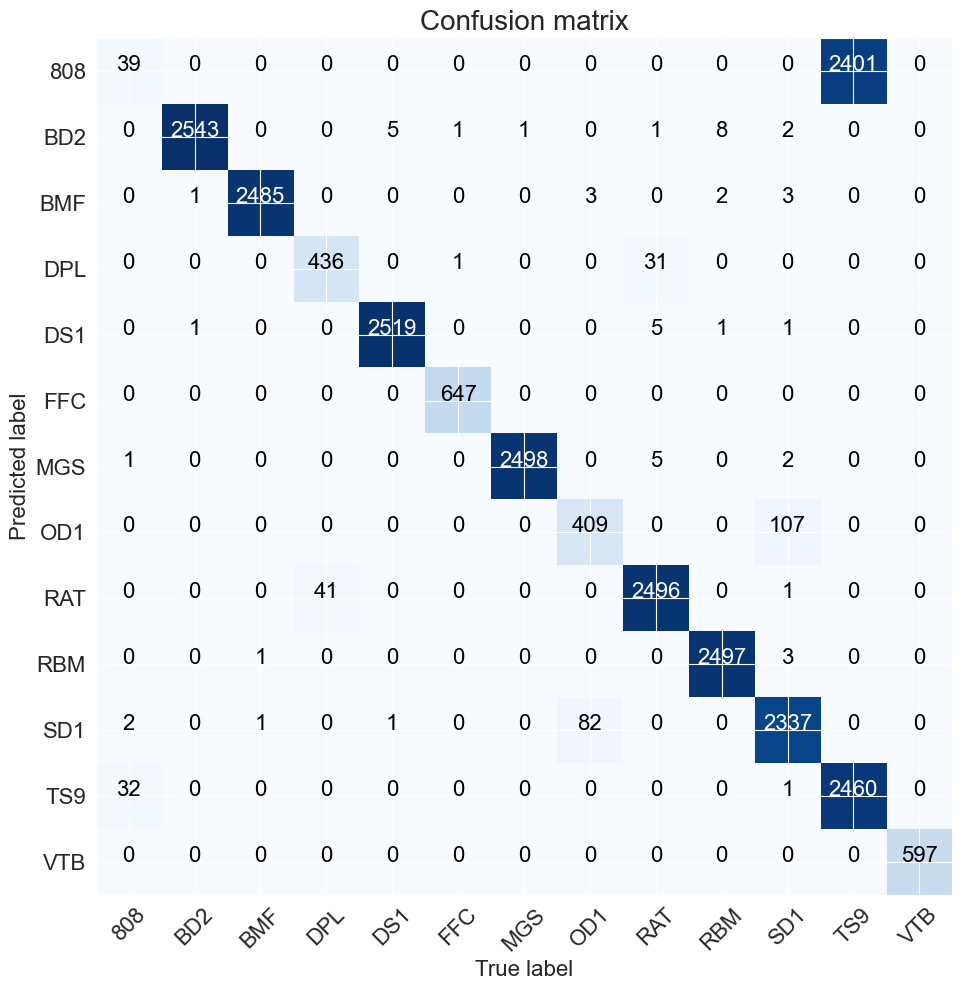

In [7]:
# Test CM
plt.figure(figsize=(10,10))

utils.plot_confusion_matrix(test_cm, fx_labels, normalize=False)

plt.xlabel('True label', fontsize=16)
plt.ylabel('Predicted label', fontsize=16)
# plt.title('FxNet - train = mono - test = mono', fontsize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16)


# plt.savefig('%s/%s/%s' % (results_folder, results_subfolder, 'fxnet_test_cm_norm.png'))

In [8]:
# extract vectors for dataframe
test_indexes = best_test_results[:, 0]
test_filenames = best_test_results[:, 1] 
test_preds = np.stack(best_test_results[:, 2])
test_targets = np.stack(best_test_results[:, 3])

test_df = pd.DataFrame(data={
                                'index': test_indexes, 
                                'filename': test_filenames,
                                'fx_pred': test_preds,
                                'fx_targ': test_targets 
                            })
test_df[:5]

,index,filename,fx_pred,fx_targ
0,16835,G71-66602-BD2-G8T0-20816,1,1
1,6167,G73-73609-808-O2T2-20901,11,0
2,21854,G91-40100-BD2-G5T8-21061,1,1
3,70819,G61-50110-RAT-D2F2-20603,8,8
4,35879,G91-76612-BMF-S8T8-21138,2,2


In [9]:
fx_labels

array(['808', 'BD2', 'BMF', 'DPL', 'DS1', 'FFC', 'MGS', 'OD1', 'RAT',
       'RBM', 'SD1', 'TS9', 'VTB'], dtype='<U3')

In [10]:
# select one effect to analyse - change fx label string accordingly
fx1 = test_df[test_df['filename'].str.contains('-DPL-')]
fx2 = test_df[test_df['filename'].str.contains('-RAT-')]

In [11]:
fx1.head()

,index,filename,fx_pred,fx_targ
28,39541,G91-65506-DPL-D2-21119,3,3
137,39095,G83-52302-DPL-D8-21011,3,3
140,38400,G73-45200-DPL-D10-20840,3,3
146,38708,G81-45105-DPL-D10-20910,3,3
178,39568,G91-67603-DPL-D10-21129,3,3


In [12]:
fx2.head()

,index,filename,fx_pred,fx_targ
3,70819,G61-50110-RAT-D2F2-20603,8,8
10,78220,G81-72608-RAT-D2F5-20978,8,8
11,75685,G73-53208-RAT-D5F5-20848,8,8
19,74643,G71-62503-RAT-D5F10-20804,8,8
30,74481,G71-60310-RAT-D2F8-20785,8,8


In [13]:
# select wrong predictions - change effect label number accordingly (e.g. 10 = SD1)
fx1_wrong_pred = fx1[fx1['fx_pred'].str.contains('8')]
fx2_wrong_pred = fx2[fx2['fx_pred'].str.contains('3')]
wrong_df = pd.concat([fx1_wrong_pred, fx2_wrong_pred], ignore_index=True)

In [14]:
# print number of wrong predictions as a function of parameters
print('D10: ',  len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D10')]))
print('D8: ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D8')]))
print('D5: ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D5')]))
print('D2: ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D2')]))
print()
print('D10 T10: ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D10T10-')]))
print('D10 T8 : ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D10T8-')]))
print('D10 T5 : ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D10T5-')]))
print('D10 T2 : ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D10T2-')]))
print('D10 T0 : ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D10T0-')]))
print()
print('D8 T10: ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D8T10-')]))
print('D8 T8 : ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D8T8-')]))
print('D8 T5 : ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D8T5-')]))
print('D8 T2 : ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D8T2-')]))
print('D8 T0 : ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D8T0-')]))
print()
print('D5 T10: ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D5T10-')]))
print('D5 T8 : ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D5T8-')]))
print('D5 T5 : ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D5T5-')]))
print('D5 T2 : ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D5T2-')]))
print('D5 T0 : ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D5T0-')]))
print()
print('D2 T10: ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D2T10-')]))
print('D2 T8 : ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D2T8-')]))
print('D2 T5 : ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D2T5-')]))
print('D2 T2 : ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D2T2-')]))
print('D2 T0 : ',   len(fx1_wrong_pred[fx1_wrong_pred['filename'].str.contains('-D2T0-')]))

D10:  13
D8:  1
D5:  7
D2:  10

D10 T10:  0
D10 T8 :  0
D10 T5 :  0
D10 T2 :  0
D10 T0 :  0

D8 T10:  0
D8 T8 :  0
D8 T5 :  0
D8 T2 :  0
D8 T0 :  0

D5 T10:  0
D5 T8 :  0
D5 T5 :  0
D5 T2 :  0
D5 T0 :  0

D2 T10:  0
D2 T8 :  0
D2 T5 :  0
D2 T2 :  0
D2 T0 :  0


In [15]:
# print number of wrong predictions as a function of parameters
print('D10: ',  len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D10')]))
print('D8: ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D8')]))
print('D5: ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D5')]))
print('D2: ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D2')]))
print()
print('D10 T10: ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D10F10-')]))
print('D10 T8 : ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D10F8-')]))
print('D10 T5 : ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D10F5-')]))
print('D10 T2 : ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D10F2-')]))
print('D10 T0 : ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D10F0-')]))
print()
print('D8 T10: ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D8F10-')]))
print('D8 T8 : ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D8F8-')]))
print('D8 T5 : ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D8F5-')]))
print('D8 T2 : ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D8F2-')]))
print('D8 T0 : ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D8F0-')]))
print()
print('D5 T10: ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D5F10-')]))
print('D5 T8 : ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D5F8-')]))
print('D5 T5 : ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D5F5-')]))
print('D5 T2 : ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D5F2-')]))
print('D5 T0 : ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D5F0-')]))
print()
print('D2 T10: ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D2F10-')]))
print('D2 T8 : ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D2F8-')]))
print('D2 T5 : ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D2F5-')]))
print('D2 T2 : ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D2F2-')]))
print('D2 T0 : ',   len(fx2_wrong_pred[fx2_wrong_pred['filename'].str.contains('-D2F0-')]))

D10:  0
D8:  1
D5:  30
D2:  10

D10 T10:  0
D10 T8 :  0
D10 T5 :  0
D10 T2 :  0
D10 T0 :  0

D8 T10:  0
D8 T8 :  0
D8 T5 :  0
D8 T2 :  0
D8 T0 :  1

D5 T10:  0
D5 T8 :  0
D5 T5 :  0
D5 T2 :  0
D5 T0 :  30

D2 T10:  0
D2 T8 :  0
D2 T5 :  0
D2 T2 :  3
D2 T0 :  7


In [16]:
# print wrong predictions where D = 5
print(wrong_df[wrong_df['filename'].str.contains('-D10-')])

    index                 filename fx_pred fx_targ
0   38500  G73-56211-DPL-D10-20851       8       3
6   38024  G63-69605-DPL-D10-20741       8       3
8   39228  G83-65506-DPL-D10-21041       8       3
9   38824  G81-57212-DPL-D10-20930       8       3
11  37544  G61-54209-DPL-D10-20615       8       3
12  39504  G91-62312-DPL-D10-21099       8       3
13  37564  G61-56211-DPL-D10-20617       8       3
14  38104  G71-47202-DPL-D10-20764       8       3
15  39520  G91-63504-DPL-D10-21117       8       3
20  39896  G93-69605-DPL-D10-21209       8       3
23  38856  G81-60310-DPL-D10-20941       8       3
26  38084  G71-45105-DPL-D10-20754       8       3
27  38180  G71-55305-DPL-D10-20780       8       3


In [17]:
# print wrong predictions where D = 5
print(wrong_df[wrong_df['filename'].str.contains('-D2-')])

    index                filename fx_pred fx_targ
1   39045  G83-48108-DPL-D2-20991       8       3
3   37641  G61-62503-DPL-D2-20648       8       3
10  38885  G81-62407-DPL-D2-20951       8       3
16  38297  G71-65601-DPL-D2-20815       8       3
17  39253  G83-67508-DPL-D2-21043       8       3
19  39185  G83-61406-DPL-D2-21028       8       3
21  37669  G61-65506-DPL-D2-20651       8       3
22  39433  G91-55400-DPL-D2-21100       8       3
24  37621  G61-61311-DPL-D2-20630       8       3
30  38689  G81-40100-DPL-D2-20905       8       3


In [18]:
import shutil, os

in_folder_DPL = 'G:/PracaMagisterska/Dane/Mono_Discret_Audio/DPL'
in_folder_RAT = 'G:/PracaMagisterska/Dane/Mono_Discret_Audio/RAT'
out_folder_DPL = 'G:/PracaMagisterska/Dane/GFX_listening_test_RNN/DPL'
out_folder_RAT = 'G:/PracaMagisterska/Dane/GFX_listening_test_RNN/RAT'

wrong_df_sub = wrong_df[wrong_df['filename'].str.contains('-D10-')]
for filename in wrong_df_sub['filename']:
    shutil.copy('%s/%s%s' % (in_folder_DPL,filename,'.wav'), '%s/%s%s' % (out_folder_DPL,filename,'.wav'))

In [19]:
print(filename)
print(filename[:9]+'-SD1-'+'D2T0-'+filename[-5:])
filename = filename[:9]+'-SD1-'+'D2T0-'+filename[-5:]

G71-55305-DPL-D10-20780
G71-55305-SD1-D2T0-20780


In [20]:
# Ensure the string is long enough before accessing specific indices
if len(filename) > 14:
    # Create a new string by replacing the character at index 14 with 'D'
    filename = filename[:14] + 'D' + filename[15:]  # This replaces the character at index 14 with 'D'
    print(filename)
else:
    print("Filename is too short to modify at the specified index.")

# Safely access index 17 if it exists
if len(filename) > 17:
    print(filename[17])  # This will print the character at index 17
else:
    print("Index 17 is out of range for the filename.")

G71-55305-SD1-D2T0-20780
0


In [21]:
filename[17]

'0'

In [22]:
wrong_df_sub = wrong_df[wrong_df['filename'].str.contains('-D10-')]
for filename in wrong_df_sub['filename']:
    filename = filename[:9]+'-RAT-'+'D2F0-'+filename[-5:]
    shutil.copy('%s/%s%s' % (in_folder_RAT,filename,'.wav'), '%s/%s%s' % (out_folder_RAT,filename,'.wav'))
    filename = filename[:9]+'-RAT-'+'D5F0-'+filename[-5:]
    shutil.copy('%s/%s%s' % (in_folder_RAT,filename,'.wav'), '%s/%s%s' % (out_folder_RAT,filename,'.wav'))
    filename = filename[:9]+'-RAT-'+'D8F0-'+filename[-5:]
    shutil.copy('%s/%s%s' % (in_folder_RAT,filename,'.wav'), '%s/%s%s' % (out_folder_RAT,filename,'.wav'))

In [23]:
# select one effect to analyse - change fx label string accordingly
df_808 = test_df[test_df['filename'].str.contains('-808-')]
df_ts9 = test_df[test_df['filename'].str.contains('-TS9-')]

In [24]:
# select wrong predictions - change effect label number accordingly (e.g. 10 = SD1)
wrong_df_808 = df_808[df_808['fx_pred'].str.match('11')]
wrong_df_ts9 = df_ts9[df_ts9['fx_pred'].str.match('0')]

In [25]:
wrong_df_808.shape

(2401, 4)

In [26]:
# Correctly create a copy of the DataFrame to avoid modifying the original
wrong_df_808_mod = wrong_df_808.copy()

# Use .loc to modify the 'filename' column safely
wrong_df_808_mod.loc[:, 'filename'] = wrong_df_808_mod['filename'].apply(lambda x: '%s%s%s' % (x[:14], 'G', x[15:]))

In [27]:
wrong_df_808_mod.shape

(2401, 4)

In [28]:
wrong_df_808_mod.head()

,index,filename,fx_pred,fx_targ
1,6167,G73-73609-808-G2T2-20901,11,0
8,4743,G73-43103-808-G10T5-20830,11,0
16,12441,G93-75611-808-G10T10-21215,11,0
50,5004,G73-50205-808-G10T8-20845,11,0
59,11152,G93-48108-808-G5T2-21147,11,0
